In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn import metrics
from sklearn.ensemble import AdaBoostClassifier

# 1) Завантажити дані, вивести назви колонок і розмір датасета

###### Датасет: [Beijing Multi-Site Air-Quality Data Data Set](https://archive.ics.uci.edu/ml/datasets/Beijing+Multi-Site+Air-Quality+Data)

###### Взято дані одного з метеорологічних центрів

In [2]:
beijingAirData = pd.read_csv("C:/Users/Studying/Data/PRSA_Data_Aotizhongxin_20130301-20170228.csv")

In [3]:
beijingAirData.head(20)

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin
5,6,2013,3,1,5,5.0,5.0,18.0,18.0,400.0,66.0,-2.2,1025.6,-19.6,0.0,N,3.7,Aotizhongxin
6,7,2013,3,1,6,3.0,3.0,18.0,32.0,500.0,50.0,-2.6,1026.5,-19.1,0.0,NNE,2.5,Aotizhongxin
7,8,2013,3,1,7,3.0,6.0,19.0,41.0,500.0,43.0,-1.6,1027.4,-19.1,0.0,NNW,3.8,Aotizhongxin
8,9,2013,3,1,8,3.0,6.0,16.0,43.0,500.0,45.0,0.1,1028.3,-19.2,0.0,NNW,4.1,Aotizhongxin
9,10,2013,3,1,9,3.0,8.0,12.0,28.0,400.0,59.0,1.2,1028.5,-19.3,0.0,N,2.6,Aotizhongxin


In [4]:
beijingAirData.shape

(35064, 18)

In [5]:
beijingAirData.size

631152

In [6]:
print(beijingAirData.columns)

Index(['No', 'year', 'month', 'day', 'hour', 'PM2.5', 'PM10', 'SO2', 'NO2',
       'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'wd', 'WSPM', 'station'],
      dtype='object')


# 2) Опрацювати пропуски (по можливості заповнити їх або видалити)

In [7]:
beijingAirData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34139 non-null  float64
 6   PM10     34346 non-null  float64
 7   SO2      34129 non-null  float64
 8   NO2      34041 non-null  float64
 9   CO       33288 non-null  float64
 10  O3       33345 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34983 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [8]:
print(beijingAirData.isnull().sum())

No            0
year          0
month         0
day           0
hour          0
PM2.5       925
PM10        718
SO2         935
NO2        1023
CO         1776
O3         1719
TEMP         20
PRES         20
DEWP         20
RAIN         20
wd           81
WSPM         14
station       0
dtype: int64


###### Додано два класи, 1 і 2. 1 - якщо показники [якості повітря](https://en.wikipedia.org/wiki/Air_quality_index) нижче норми, 2 - якщо бодай один з показників перевищує її.


In [9]:
conditions = [
    (beijingAirData['PM2.5'] <=60) & (beijingAirData['PM10'] <=100) & (beijingAirData['SO2'] <= 80) & (beijingAirData['NO2'] <=80) & (beijingAirData['O3'] <= 100),
    (beijingAirData['PM2.5'] > 61) | (beijingAirData['PM10'] >101) | (beijingAirData['SO2'] > 81) | (beijingAirData['NO2'] >81) | (beijingAirData['O3'] > 101)
]

In [10]:
values = [1, 2]

In [11]:
beijingAirData['airQuality'] = np.select(conditions, values)

In [12]:
beijingAirData.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,airQuality
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin,1
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin,1
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin,1
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin,1
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin,1


In [13]:
beijingAirData['airQuality'].describe()

count    35064.000000
mean         1.571498
std          0.575943
min          0.000000
25%          1.000000
50%          2.000000
75%          2.000000
max          2.000000
Name: airQuality, dtype: float64

In [14]:
index = beijingAirData[ (beijingAirData['airQuality'] == 0)].index
beijingAirData.drop(index , inplace=True)

In [15]:
updated_beijingAirData = beijingAirData.dropna(axis=0)

In [16]:
updated_beijingAirData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31618 entries, 0 to 35063
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   No          31618 non-null  int64  
 1   year        31618 non-null  int64  
 2   month       31618 non-null  int64  
 3   day         31618 non-null  int64  
 4   hour        31618 non-null  int64  
 5   PM2.5       31618 non-null  float64
 6   PM10        31618 non-null  float64
 7   SO2         31618 non-null  float64
 8   NO2         31618 non-null  float64
 9   CO          31618 non-null  float64
 10  O3          31618 non-null  float64
 11  TEMP        31618 non-null  float64
 12  PRES        31618 non-null  float64
 13  DEWP        31618 non-null  float64
 14  RAIN        31618 non-null  float64
 15  wd          31618 non-null  object 
 16  WSPM        31618 non-null  float64
 17  station     31618 non-null  object 
 18  airQuality  31618 non-null  int32  
dtypes: float64(11), int32(1),

In [17]:
features = updated_beijingAirData.drop(labels = ['year', 'month', 'day', 'hour', 'CO', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'wd', 'WSPM', 'station', 'airQuality'], axis = 1)

In [18]:
label = updated_beijingAirData.drop(labels = ['No', 'year', 'month', 'day', 'hour', 'PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'wd', 'WSPM', 'station'], axis = 1)

In [19]:
features

,No,PM2.5,PM10,SO2,NO2,O3
0,1,4.0,4.0,4.0,7.0,77.0
1,2,8.0,8.0,4.0,7.0,77.0
2,3,7.0,7.0,5.0,10.0,73.0
3,4,6.0,6.0,11.0,11.0,72.0
4,5,3.0,3.0,12.0,12.0,72.0
...,...,...,...,...,...,...
35059,35060,12.0,29.0,5.0,35.0,95.0
35060,35061,13.0,37.0,7.0,45.0,81.0
35061,35062,16.0,37.0,10.0,66.0,58.0
35062,35063,21.0,44.0,12.0,87.0,35.0


In [20]:
label

,airQuality
0,1
1,1
2,1
3,1
4,1
...,...
35059,1
35060,1
35061,1
35062,2


# 3) Візуалізувати дані: побудувати графік (heatmap), що відображає кореляції ознак між собою і з цільовою змінною (розміткою); побудувати гістограми розподілу ознак і boxplot-и ознак відносно цільової змінної (якщо ознак занадто багато обмежитися декількома)

<AxesSubplot: >

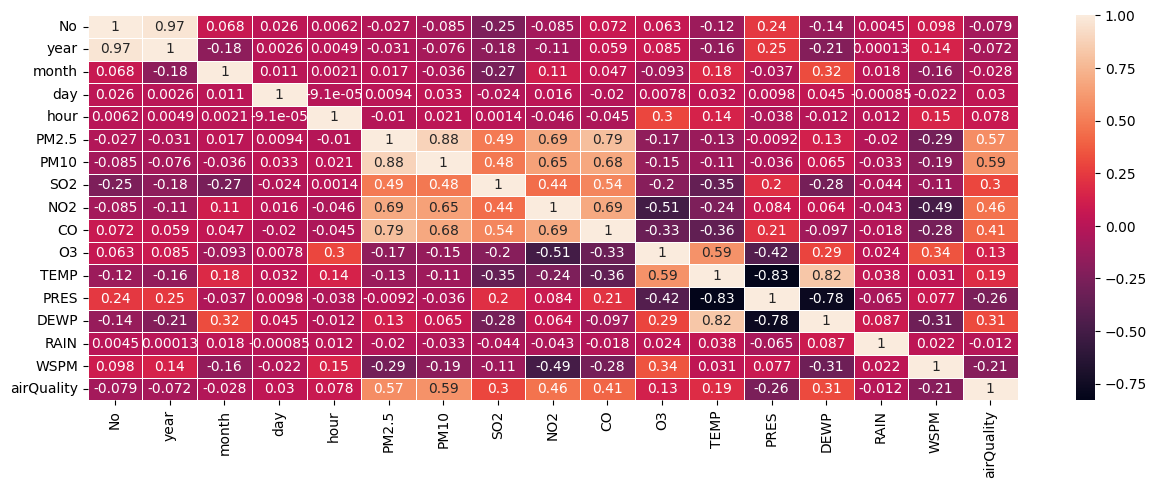

In [21]:
plt.figure(figsize=(15,5))
sns.heatmap(updated_beijingAirData.corr(numeric_only=True), annot = True, linewidth = 0.5)

In [22]:
updated_beijingAirData['PM2.5'].describe()

count    31618.000000
mean        82.116750
std         80.620188
min          3.000000
25%         22.000000
50%         58.000000
75%        114.000000
max        713.000000
Name: PM2.5, dtype: float64

In [23]:
bin_valuesPM2dot5 = np.arange(start=0, stop=850, step=1)

(array([  0.,   0.,   0., 419., 149., 259., 343., 421., 535., 571., 562.,
        526., 549., 537., 472., 423., 400., 358., 388., 304., 330., 311.,
        334., 302., 282., 266., 257., 243., 235., 218., 237., 228., 235.,
        232., 220., 217., 226., 231., 227., 217., 217., 204., 221., 199.,
        220., 201., 227., 197., 163., 185., 188., 188., 174., 160., 185.,
        198., 175., 182., 162., 178., 171.,  90., 165., 189., 171., 171.,
        178., 170., 181., 165., 185., 181., 159., 156., 179., 175., 172.,
        142., 146., 148., 154., 143., 125., 149., 146., 152., 144., 134.,
        166., 146., 142., 128., 130., 121., 168., 117., 120., 132., 117.,
        109., 125., 116., 116., 108., 107., 117., 108.,  87., 105.,  99.,
        102.,  92., 113., 101., 128.,  85., 110., 107.,  82.,  80.,  92.,
        102., 100.,  90.,  87.,  73.,  75.,  91.,  85.,  83.,  86.,  77.,
         75.,  68.,  68.,  75.,  68.,  81.,  69.,  58.,  91.,  63.,  76.,
         82.,  58.,  56.,  69.,  60., 

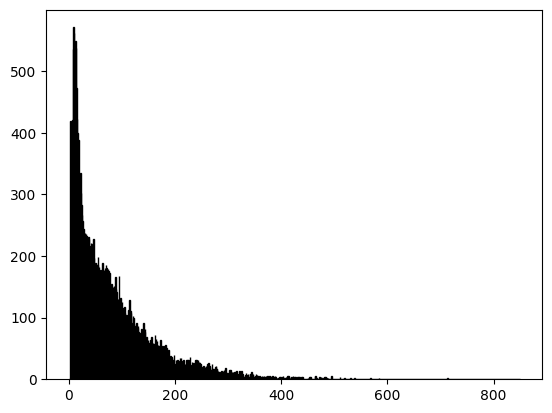

In [24]:
plt.hist(updated_beijingAirData['PM2.5'], bins = bin_valuesPM2dot5, edgecolor="black")

In [25]:
updated_beijingAirData['PM10'].describe()

count    31618.000000
mean       109.398811
std         93.913318
min          2.000000
25%         37.000000
50%         86.000000
75%        154.000000
max        948.000000
Name: PM10, dtype: float64

(array([1.7374e+04, 9.1370e+03, 3.4220e+03, 1.1710e+03, 3.2300e+02,
        1.2800e+02, 4.0000e+01, 6.0000e+00, 1.1000e+01, 6.0000e+00]),
 array([  2. ,  96.6, 191.2, 285.8, 380.4, 475. , 569.6, 664.2, 758.8,
        853.4, 948. ]),
 <BarContainer object of 10 artists>)

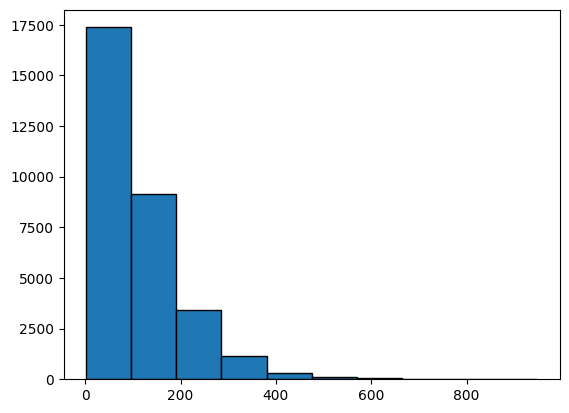

In [26]:
plt.hist(updated_beijingAirData['PM10'], edgecolor="black")

(array([2.4531e+04, 4.0830e+03, 1.7010e+03, 6.9400e+02, 3.0600e+02,
        1.7000e+02, 8.6000e+01, 3.6000e+01, 1.0000e+01, 1.0000e+00]),
 array([  0.5712 ,  23.41408,  46.25696,  69.09984,  91.94272, 114.7856 ,
        137.62848, 160.47136, 183.31424, 206.15712, 229.     ]),
 <BarContainer object of 10 artists>)

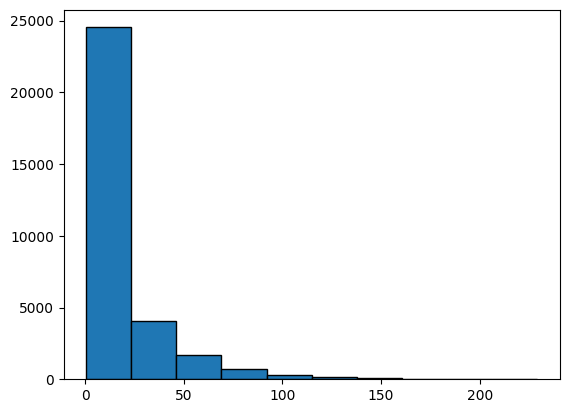

In [27]:
plt.hist(updated_beijingAirData['SO2'], edgecolor="black")

(array([8.140e+03, 9.755e+03, 7.247e+03, 4.109e+03, 1.565e+03, 5.650e+02,
        1.770e+02, 4.500e+01, 9.000e+00, 6.000e+00]),
 array([  2. ,  30.8,  59.6,  88.4, 117.2, 146. , 174.8, 203.6, 232.4,
        261.2, 290. ]),
 <BarContainer object of 10 artists>)

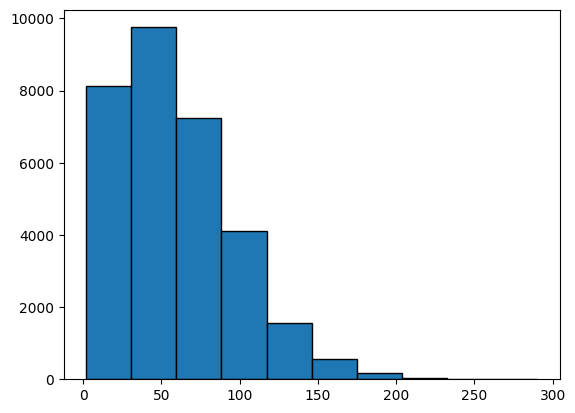

In [28]:
plt.hist(updated_beijingAirData['NO2'], edgecolor="black")

(array([1.587e+04, 8.237e+03, 3.908e+03, 1.714e+03, 1.028e+03, 6.090e+02,
        2.010e+02, 4.100e+01, 7.000e+00, 3.000e+00]),
 array([2.1420000e-01, 4.2492780e+01, 8.4771360e+01, 1.2704994e+02,
        1.6932852e+02, 2.1160710e+02, 2.5388568e+02, 2.9616426e+02,
        3.3844284e+02, 3.8072142e+02, 4.2300000e+02]),
 <BarContainer object of 10 artists>)

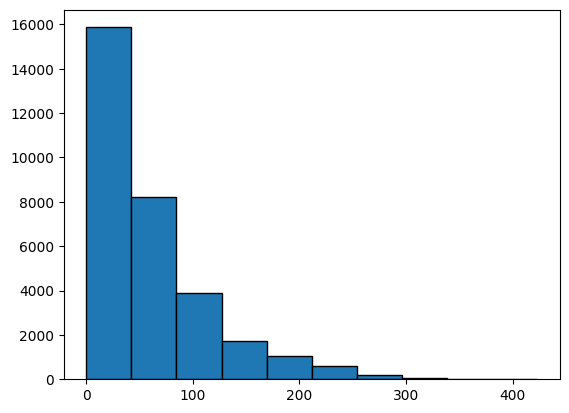

In [29]:
plt.hist(updated_beijingAirData['O3'], edgecolor="black")

(array([11672.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 19946.]),
 array([1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. ]),
 <BarContainer object of 10 artists>)

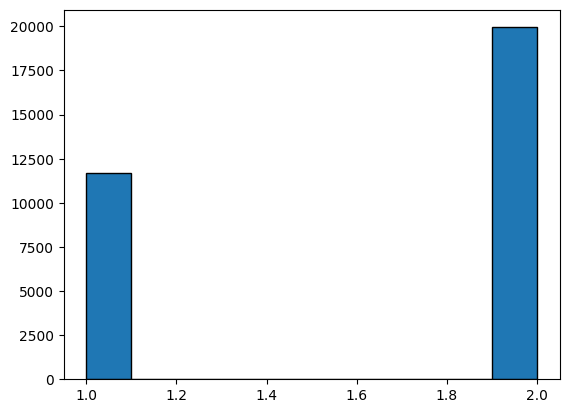

In [30]:
plt.hist(updated_beijingAirData['airQuality'], edgecolor="black")

<AxesSubplot: title={'center': 'PM2.5'}, xlabel='airQuality'>

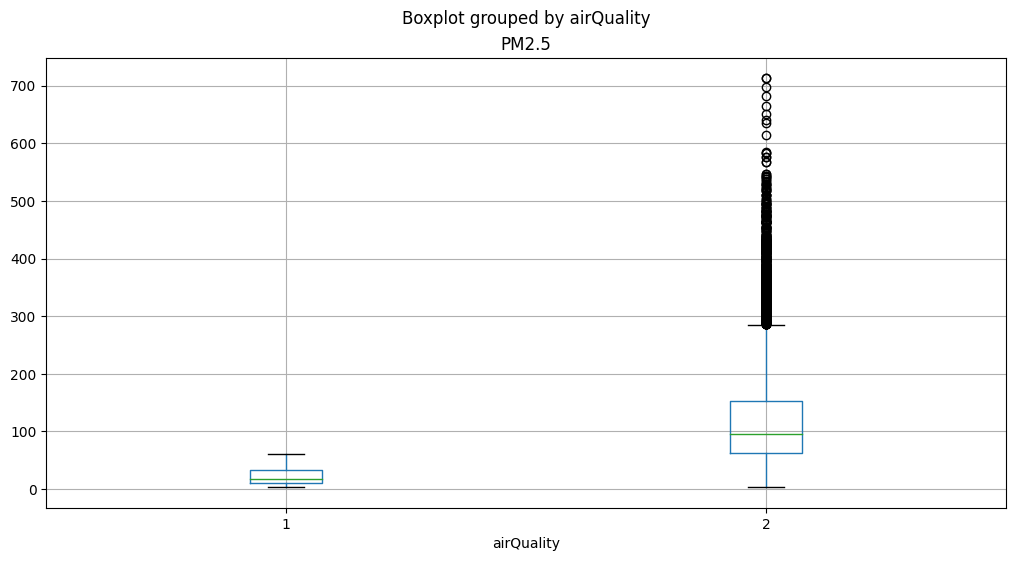

In [31]:
updated_beijingAirData.boxplot(by ='airQuality', column = ['PM2.5'], figsize=[12,6])

<AxesSubplot: title={'center': 'PM10'}, xlabel='airQuality'>

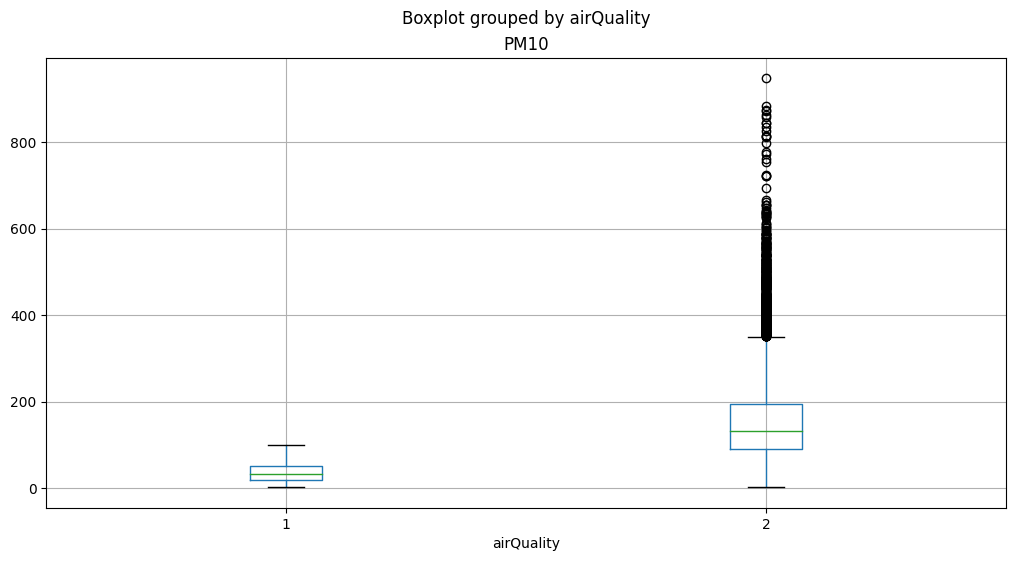

In [32]:
updated_beijingAirData.boxplot(by ='airQuality', column = ['PM10'], figsize=[12,6])

<AxesSubplot: title={'center': 'SO2'}, xlabel='airQuality'>

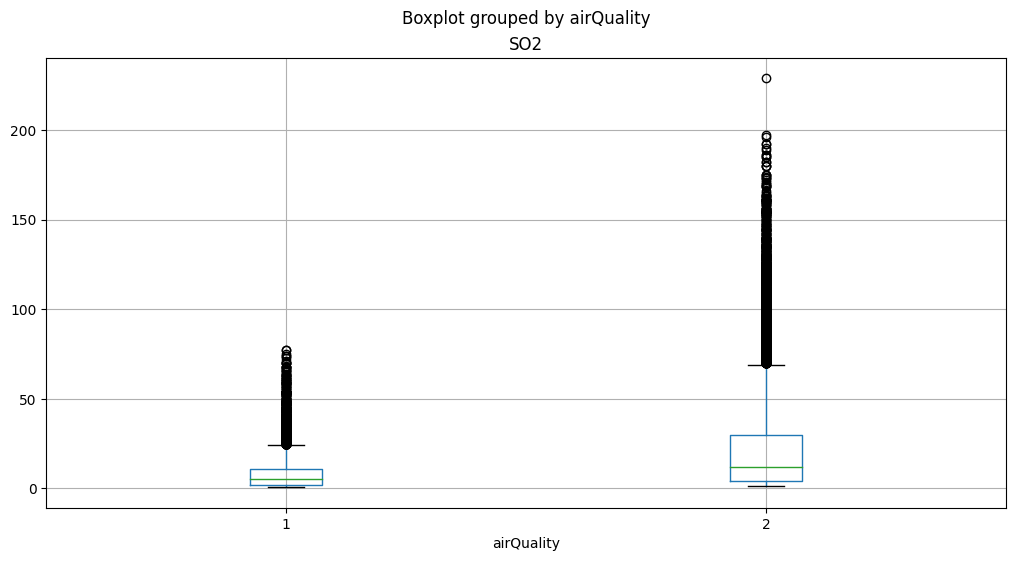

In [33]:
updated_beijingAirData.boxplot(by ='airQuality', column = ['SO2'], figsize=[12,6])

<AxesSubplot: title={'center': 'NO2'}, xlabel='airQuality'>

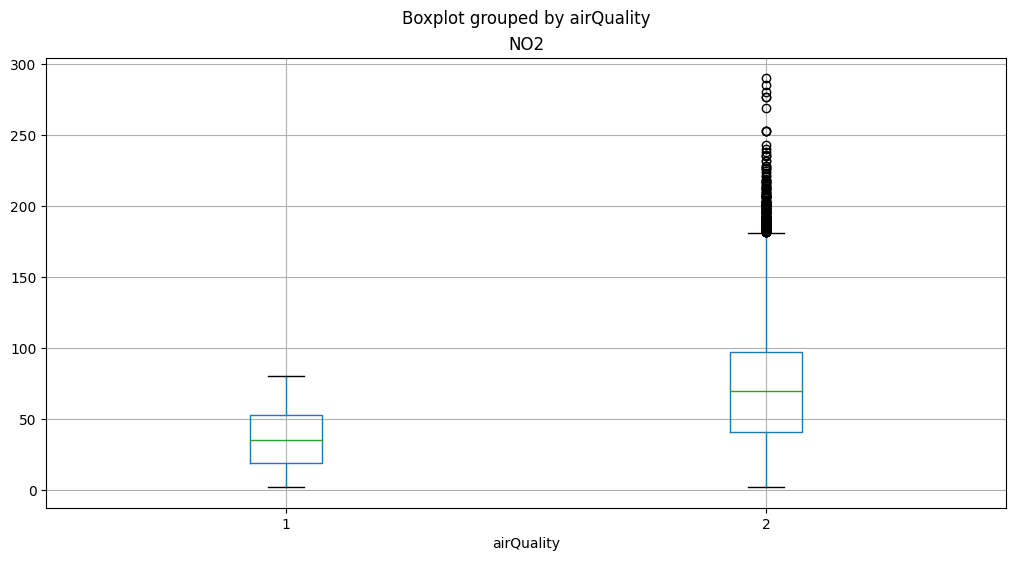

In [34]:
updated_beijingAirData.boxplot(by ='airQuality', column = ['NO2'], figsize=[12,6])

<AxesSubplot: title={'center': 'O3'}, xlabel='airQuality'>

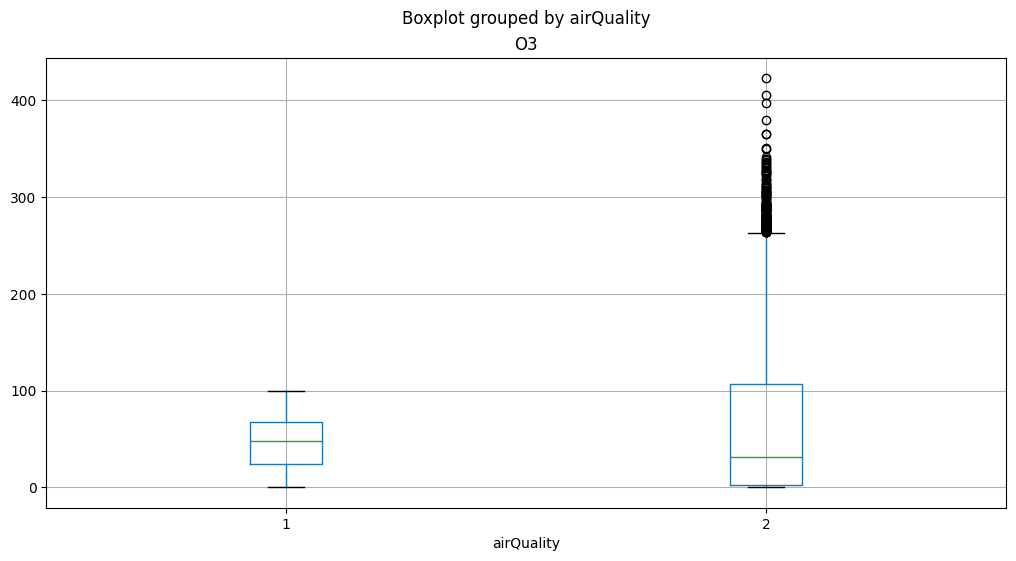

In [35]:
updated_beijingAirData.boxplot(by ='airQuality', column = ['O3'], figsize=[12,6])

# 4) Нормалізувати дані

In [36]:
updated_beijingAirData_normal = preprocessing.normalize(features)
updated_beijingAirData_normal = pd.DataFrame(updated_beijingAirData_normal, columns = features.columns)
updated_beijingAirData_normal['airQuality'] = label
updated_beijingAirData_normal.head()

,No,PM2.5,PM10,SO2,NO2,O3,airQuality
0,0.012881,0.051524,0.051524,0.051524,0.090167,0.991837,1.0
1,0.025553,0.102212,0.102212,0.051106,0.089435,0.983790,1.0
2,0.040230,0.093869,0.093869,0.067049,0.134098,0.978918,1.0
3,0.053867,0.080801,0.080801,0.148136,0.148136,0.969615,1.0
4,0.067328,0.040397,0.040397,0.161588,0.161588,0.969527,1.0


In [37]:
X_train, X_test, Y_train, Y_test = train_test_split(updated_beijingAirData_normal.drop(labels = ["airQuality"],axis = 1), label, test_size = 0.25, random_state = 0)

# 5) Провести навчання наступних класифікаторів:

### KNN

In [38]:
accuracy_for_knn ={}

In [39]:
for i in range(1, 50, 2):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train, Y_train.values.ravel())
    knn_prediction = knn.predict(X_test)
    accuracy = accuracy_score(Y_test, knn_prediction)
    accuracy_for_knn[i] = accuracy

In [40]:
accuracy_for_knn

{1: 0.9033523086654016,
 3: 0.9123339658444023,
 5: 0.9122074636306136,
 7: 0.9125869702719798,
 9: 0.9128399746995572,
 11: 0.9118279569892473,
 13: 0.9106894370651486,
 15: 0.9062618595825427,
 17: 0.9067678684376976,
 19: 0.9065148640101202,
 21: 0.9060088551549652,
 23: 0.9060088551549652,
 25: 0.905123339658444,
 27: 0.9055028462998103,
 29: 0.9067678684376976,
 31: 0.9053763440860215,
 33: 0.9044908285895004,
 35: 0.9039848197343453,
 37: 0.9033523086654016,
 39: 0.9027197975964579,
 41: 0.9018342820999368,
 43: 0.902213788741303,
 45: 0.9025932953826692,
 47: 0.9008222643896269,
 49: 0.9009487666034156}

In [41]:
sort_orders = sorted(accuracy_for_knn.items(), key=lambda x: x[1], reverse=True)
print(sort_orders[0])

(9, 0.9128399746995572)


In [42]:
knn = KNeighborsClassifier(n_neighbors = 9)
knn.fit(X_train, Y_train.values.ravel())
knn_prediction = knn.predict(X_test)

In [43]:
knn_default = KNeighborsClassifier()
knn_default.fit(X_train, Y_train.values.ravel())
knn_prediction_default = knn_default.predict(X_test)

In [44]:
print("Default knn")
print()
print(classification_report(Y_test ,knn_prediction_default))
print('Confusion Matrix: \n', confusion_matrix(Y_test,knn_prediction_default))
print()
print('Accuracy: ', accuracy_score(Y_test,knn_prediction_default))


Default knn

              precision    recall  f1-score   support

           1       0.89      0.86      0.88      2865
           2       0.92      0.94      0.93      5040

    accuracy                           0.91      7905
   macro avg       0.91      0.90      0.90      7905
weighted avg       0.91      0.91      0.91      7905

Confusion Matrix: 
 [[2462  403]
 [ 291 4749]]

Accuracy:  0.9122074636306136


In [45]:
print("neighbors = 9")
print()
print(classification_report(Y_test ,knn_prediction ))
print('Confusion Matrix: \n', confusion_matrix(Y_test,knn_prediction))
print()
print('Accuracy: ', accuracy_score(Y_test,knn_prediction))

neighbors = 9

              precision    recall  f1-score   support

           1       0.90      0.86      0.88      2865
           2       0.92      0.95      0.93      5040

    accuracy                           0.91      7905
   macro avg       0.91      0.90      0.90      7905
weighted avg       0.91      0.91      0.91      7905

Confusion Matrix: 
 [[2450  415]
 [ 274 4766]]

Accuracy:  0.9128399746995572


### Дерево прийняття рішень

In [46]:
tree_classifier = DecisionTreeClassifier()
tree_classifier.fit(X_train, Y_train)
tree_prediction = tree_classifier.predict(X_test)

In [47]:
print(classification_report(Y_test ,tree_prediction ))
print('Confusion Matrix: \n', confusion_matrix(Y_test,tree_prediction))
print()
print('Accuracy: ', accuracy_score(Y_test,tree_prediction))

              precision    recall  f1-score   support

           1       0.87      0.87      0.87      2865
           2       0.93      0.92      0.93      5040

    accuracy                           0.90      7905
   macro avg       0.90      0.90      0.90      7905
weighted avg       0.90      0.90      0.90      7905

Confusion Matrix: 
 [[2498  367]
 [ 386 4654]]

Accuracy:  0.9047438330170778


### SVM

In [48]:
from sklearnex import patch_sklearn

In [49]:
patch_sklearn("SVC")

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [50]:
param_grid = {'C': [0.1, 1, 10, 100, 1000, 10000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']} 

In [51]:
grid = GridSearchCV(SVC(), param_grid, refit = True)

In [52]:
grid.fit(X_train, Y_train.values.ravel())

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000, 10000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']})

In [53]:
grid.best_params_

{'C': 10000, 'gamma': 1, 'kernel': 'rbf'}

In [54]:
svm_classifier = SVC()


In [55]:
svm_classifier.fit(X_train, Y_train.values.ravel())

SVC()

In [56]:
svm_prediction = svm_classifier.predict(X_test)

In [57]:
grid_prediction = grid.predict(X_test)

In [58]:
print("Without GridSearch ")
print(classification_report(Y_test ,svm_prediction ))
print('Confusion Matrix: \n', confusion_matrix(Y_test,svm_prediction))
print()
print('Accuracy: ', accuracy_score(Y_test,svm_prediction))

Without GridSearch 
              precision    recall  f1-score   support

           1       0.92      0.01      0.02      2865
           2       0.64      1.00      0.78      5040

    accuracy                           0.64      7905
   macro avg       0.78      0.50      0.40      7905
weighted avg       0.74      0.64      0.50      7905

Confusion Matrix: 
 [[  23 2842]
 [   2 5038]]

Accuracy:  0.6402277039848198


In [59]:
print("With GridSearch ")
print(classification_report(Y_test ,grid_prediction ))
print('Confusion Matrix: \n', confusion_matrix(Y_test,grid_prediction))
print()
print('Accuracy: ', accuracy_score(Y_test,grid_prediction))

With GridSearch 
              precision    recall  f1-score   support

           1       0.75      0.87      0.80      2865
           2       0.92      0.84      0.87      5040

    accuracy                           0.85      7905
   macro avg       0.83      0.85      0.84      7905
weighted avg       0.86      0.85      0.85      7905

Confusion Matrix: 
 [[2485  380]
 [ 825 4215]]

Accuracy:  0.8475648323845667


### Random Forest

In [60]:
randomForest = RandomForestClassifier()

In [61]:
randomForest.fit(X_train, Y_train.values.ravel())

RandomForestClassifier()

In [62]:
randomForest_prediction = randomForest.predict(X_test)

In [63]:
randomForest_prediction

array([2, 2, 2, ..., 1, 1, 2])

In [64]:
print(classification_report(Y_test, randomForest_prediction ))
print('Confusion Matrix: \n', confusion_matrix(Y_test, randomForest_prediction))
print()
print('Accuracy: ', accuracy_score(Y_test,randomForest_prediction))

              precision    recall  f1-score   support

           1       0.92      0.90      0.91      2865
           2       0.95      0.96      0.95      5040

    accuracy                           0.94      7905
   macro avg       0.94      0.93      0.93      7905
weighted avg       0.94      0.94      0.94      7905

Confusion Matrix: 
 [[2589  276]
 [ 212 4828]]

Accuracy:  0.9382669196710942


### AdaBoost

In [65]:
ada = AdaBoostClassifier()

In [66]:
ada.fit(X_train, Y_train.values.ravel())

AdaBoostClassifier()

In [67]:
ada_predictions = ada.predict(X_test)

In [68]:
print(classification_report(Y_test, ada_predictions ))
print('Confusion Matrix: \n', confusion_matrix(Y_test, ada_predictions))
print()
print('Accuracy: ', accuracy_score(Y_test,ada_predictions))

              precision    recall  f1-score   support

           1       0.81      0.76      0.78      2865
           2       0.87      0.90      0.88      5040

    accuracy                           0.85      7905
   macro avg       0.84      0.83      0.83      7905
weighted avg       0.85      0.85      0.85      7905

Confusion Matrix: 
 [[2176  689]
 [ 513 4527]]

Accuracy:  0.8479443390259329
